In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

In [61]:
employee = pd.read_csv("Employee.csv")
employee.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


In [62]:
city_count = employee["City"].value_counts()

city_count

City
Bangalore    2228
Pune         1268
New Delhi    1157
Name: count, dtype: int64

# Bad Visualization 1


In [63]:
x = city_count.index.values
y = city_count.values

print("City", x)
print("Total", y)

City ['Bangalore' 'Pune' 'New Delhi']
Total [2228 1268 1157]


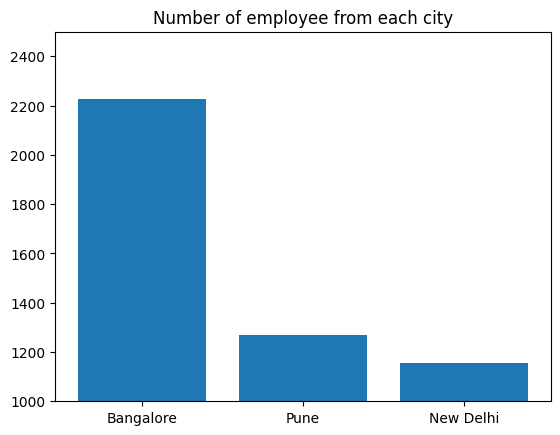

In [64]:
fig, ax = plt.subplots()

ax.bar(x, y)

ax.set_ylim((1000, 2500))

ax.set_title("Number of employee from each city")

plt.show()

# Bad Visualization 2


In [65]:
age_count = employee["Age"].value_counts(sort=False)
age_count = age_count.sort_index()
age_count

Age
22     49
23     48
24    385
25    418
26    645
27    625
28    630
29    230
30    220
31    125
32    132
33    124
34    136
35    123
36    139
37    141
38    136
39    131
40    134
41     82
Name: count, dtype: int64

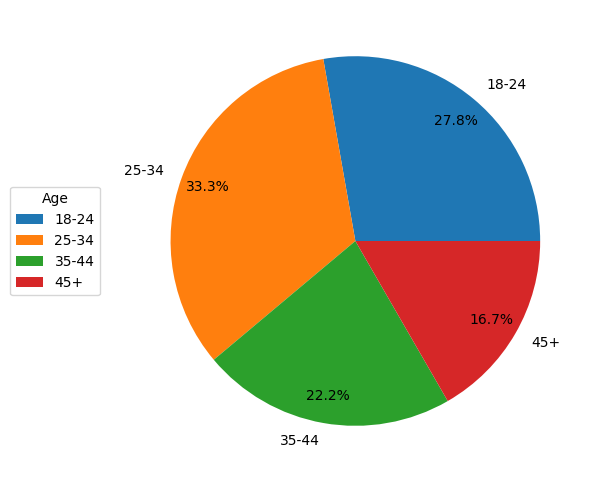

In [66]:
# Example data (replace this with your actual data)
age_count = [25, 30, 20, 15]
age_labels = ["18-24", "25-34", "35-44", "45+"]

import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8, 6))  # Adjust the figure size as needed

explode = (0, 0, 0, 0)

ax.pie(
    age_count, labels=age_labels, autopct="%1.1f%%", pctdistance=0.85, explode=explode
)

ax.legend(
    age_labels,  # Use age_labels for the legend
    loc="center",
    bbox_to_anchor=[-0.65, 0, 1, 1],
    title="Age",
)

plt.show()

# Bad Visualization 3


In [67]:
education = pd.DataFrame(
    {
        "count": employee[["Education", "JoiningYear"]]
        .groupby("Education")
        .value_counts()
    }
).reset_index()

education.head()

,Education,JoiningYear,count
0,Bachelors,2017,660
1,Bachelors,2015,640
2,Bachelors,2014,605
3,Bachelors,2013,531
4,Bachelors,2016,461


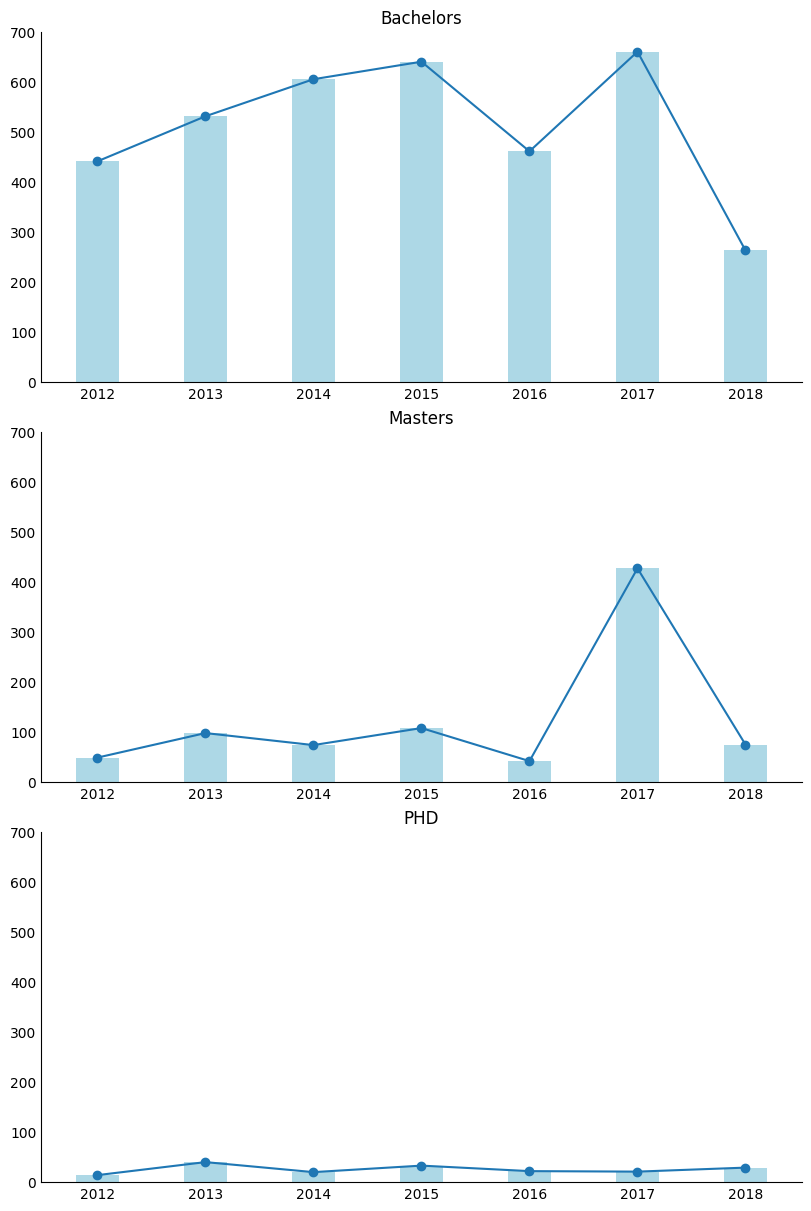

In [68]:
import matplotlib.pyplot as plt
import numpy as np

fig, axs = plt.subplots(3, 1, constrained_layout=True, figsize=(8, 12))

edu_level = ["Bachelors", "Masters", "PHD"]

for i, edu in enumerate(edu_level):
    edu_data = education.loc[education["Education"] == edu].sort_values(
        by="JoiningYear"
    )
    years = edu_data["JoiningYear"]
    values = edu_data["count"]

    # Create bar chart with connected lines
    axs[i].bar(
        years, values, width=0.4, align="center", color="lightblue", label="Bar Chart"
    )
    axs[i].plot(years, values, marker="o", linestyle="-", label="Line Chart")

    axs[i].set_title(edu)
    axs[i].set_xticks(np.arange(2012, 2019))
    axs[i].set_ylim(0, 700)  # Set the Y-axis range from 0 to 700
    axs[i].spines[["top", "right"]].set_visible(False)
    axs[i].tick_params(axis="both", which="both", length=0)

plt.show()

# Bad Visualization 4


In [69]:
emp_leaving = employee[["JoiningYear", "LeaveOrNot"]].groupby("JoiningYear").sum()
emp_leaving = emp_leaving.rename(columns={"LeaveOrNot": "Leaving"})
emp_leaving

,Leaving
JoiningYear,
2012,109
2013,224
2014,173
2015,318
2016,117
2017,297
2018,362


In [70]:
total_employee = employee[["JoiningYear", "LeaveOrNot"]].groupby("JoiningYear").count()
total_employee = total_employee.rename(columns={"LeaveOrNot": "Total Employee"})
total_employee

,Total Employee
JoiningYear,
2012,504
2013,669
2014,699
2015,781
2016,525
2017,1108
2018,367


In [71]:
emp_staying = total_employee["Total Employee"] - emp_leaving["Leaving"]

emp_staying = emp_staying.rename("Staying")

emp_staying

JoiningYear
2012    395
2013    445
2014    526
2015    463
2016    408
2017    811
2018      5
Name: Staying, dtype: int64

In [72]:
turnover = pd.concat([emp_leaving, emp_staying, total_employee], axis=1).reset_index()

turnover

,JoiningYear,Leaving,Staying,Total Employee
0,2012,109,395,504
1,2013,224,445,669
2,2014,173,526,699
3,2015,318,463,781
4,2016,117,408,525
5,2017,297,811,1108
6,2018,362,5,367


In [73]:
joining_year = turnover["JoiningYear"].values

joining_year

array([2012, 2013, 2014, 2015, 2016, 2017, 2018], dtype=int64)

In [74]:
turnover.loc[turnover["JoiningYear"] == 2014, ["Leaving", "Staying"]].values[0]

array([173, 526], dtype=int64)

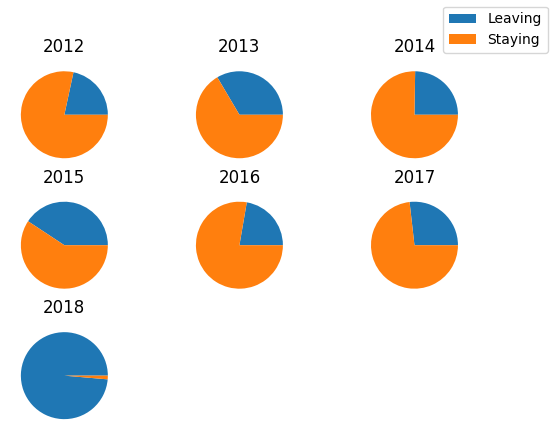

In [75]:
fig = plt.figure()
axs = []

for i, year in enumerate(joining_year):
    ax = fig.add_subplot(3, 3, i + 1)

    ax.pie(
        turnover.loc[turnover["JoiningYear"] == year, ["Leaving", "Staying"]].values[0]
    )
    ax.set_title(year)
    axs.append(ax)

fig.legend(["Leaving", "Staying"])
plt.show()

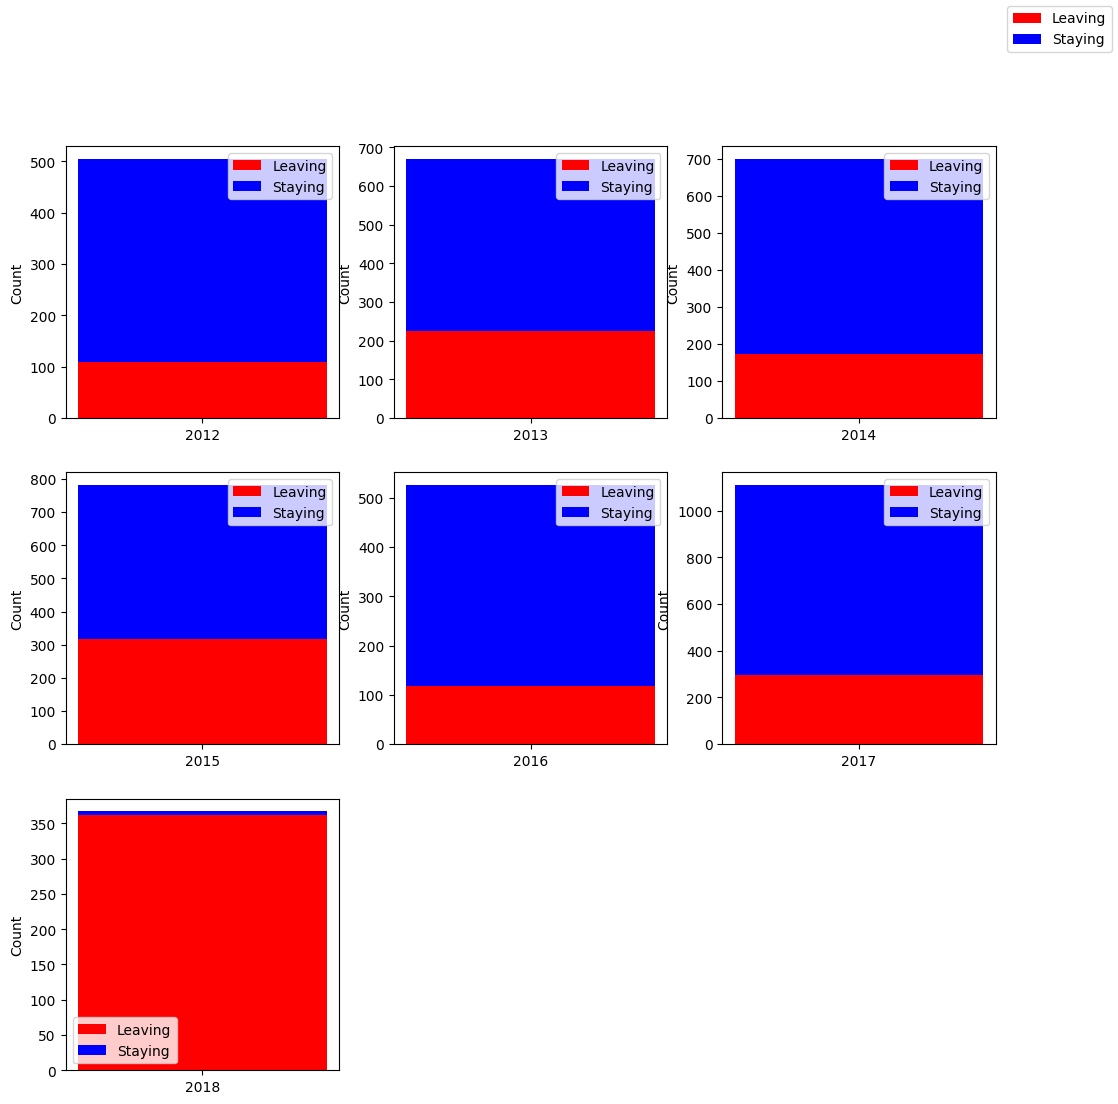

In [80]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12, 12))
axs = []

for i, year in enumerate(joining_year):
    ax = fig.add_subplot(3, 3, i + 1)

    turnover_data = turnover.loc[turnover["JoiningYear"] == year, ["Leaving", "Staying"]]

    # Create a stacked bar chart
    ax.bar([str(year)], turnover_data["Leaving"], color='red', label="Leaving")
    ax.bar([str(year)], turnover_data["Staying"], bottom=turnover_data["Leaving"], color='blue', label="Staying")

    ax.set_ylabel("Count")
    ax.legend()

    axs.append(ax)

# Add a common legend outside of the subplots
fig.legend(["Leaving", "Staying"], loc='upper right')

plt.show()


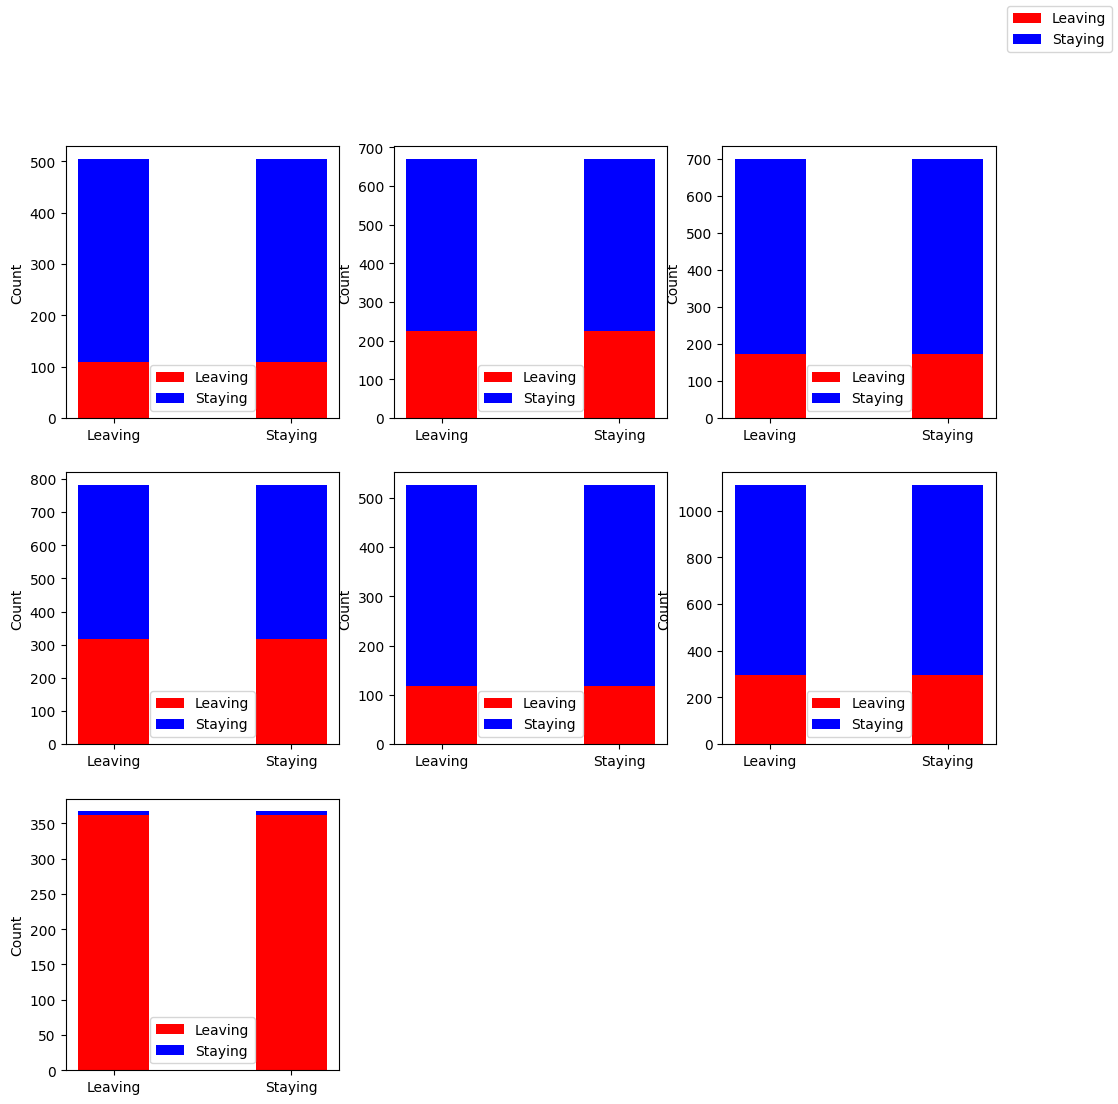

In [87]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12, 12))
axs = []

for i, year in enumerate(joining_year):
    ax = fig.add_subplot(3, 3, i + 1)

    turnover_data = turnover.loc[turnover["JoiningYear"] == year, ["Leaving", "Staying"]]

    # Create a grouped bar chart
    x = [1, 2]  # X-positions for bars (1 for Leaving, 2 for Staying)
    ax.bar(x, turnover_data["Leaving"], width=0.4, color='red', label="Leaving")
    ax.bar(x, turnover_data["Staying"], width=0.4, bottom=turnover_data["Leaving"], color='blue', label="Staying")

    ax.set_xticks(x)
    ax.set_xticklabels(["Leaving", "Staying"])
    ax.set_ylabel("Count")
    ax.legend()

    axs.append(ax)

# Add a common legend outside of the subplots
fig.legend(["Leaving", "Staying"], loc='upper right')

plt.show()
